Creating reconstruction comparison plot...


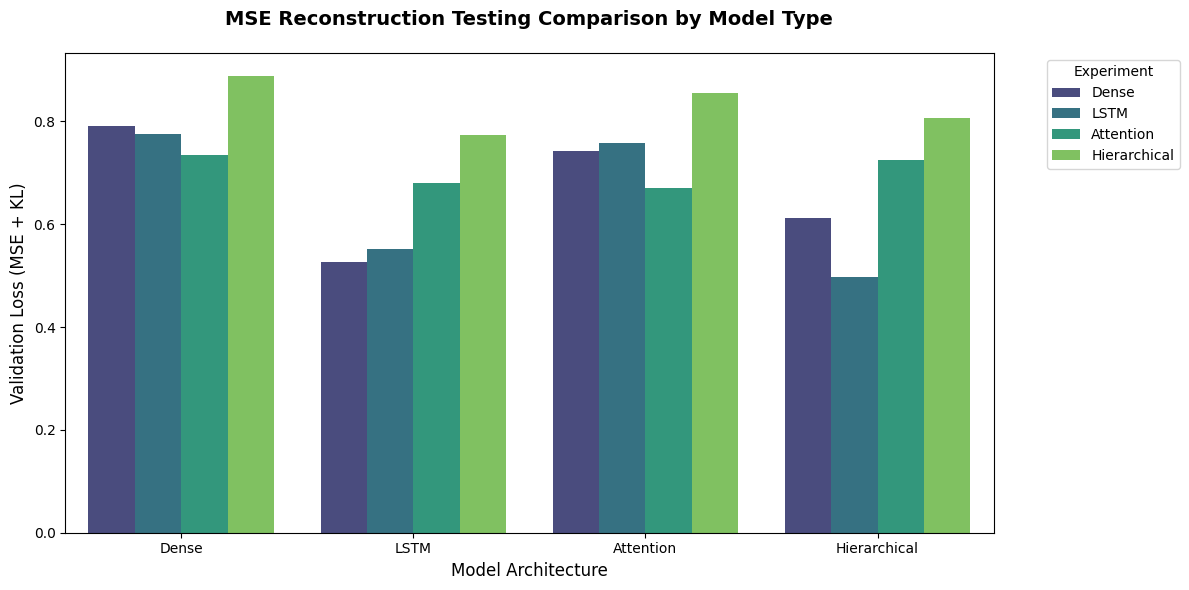

Creating generative metrics comparison plot...


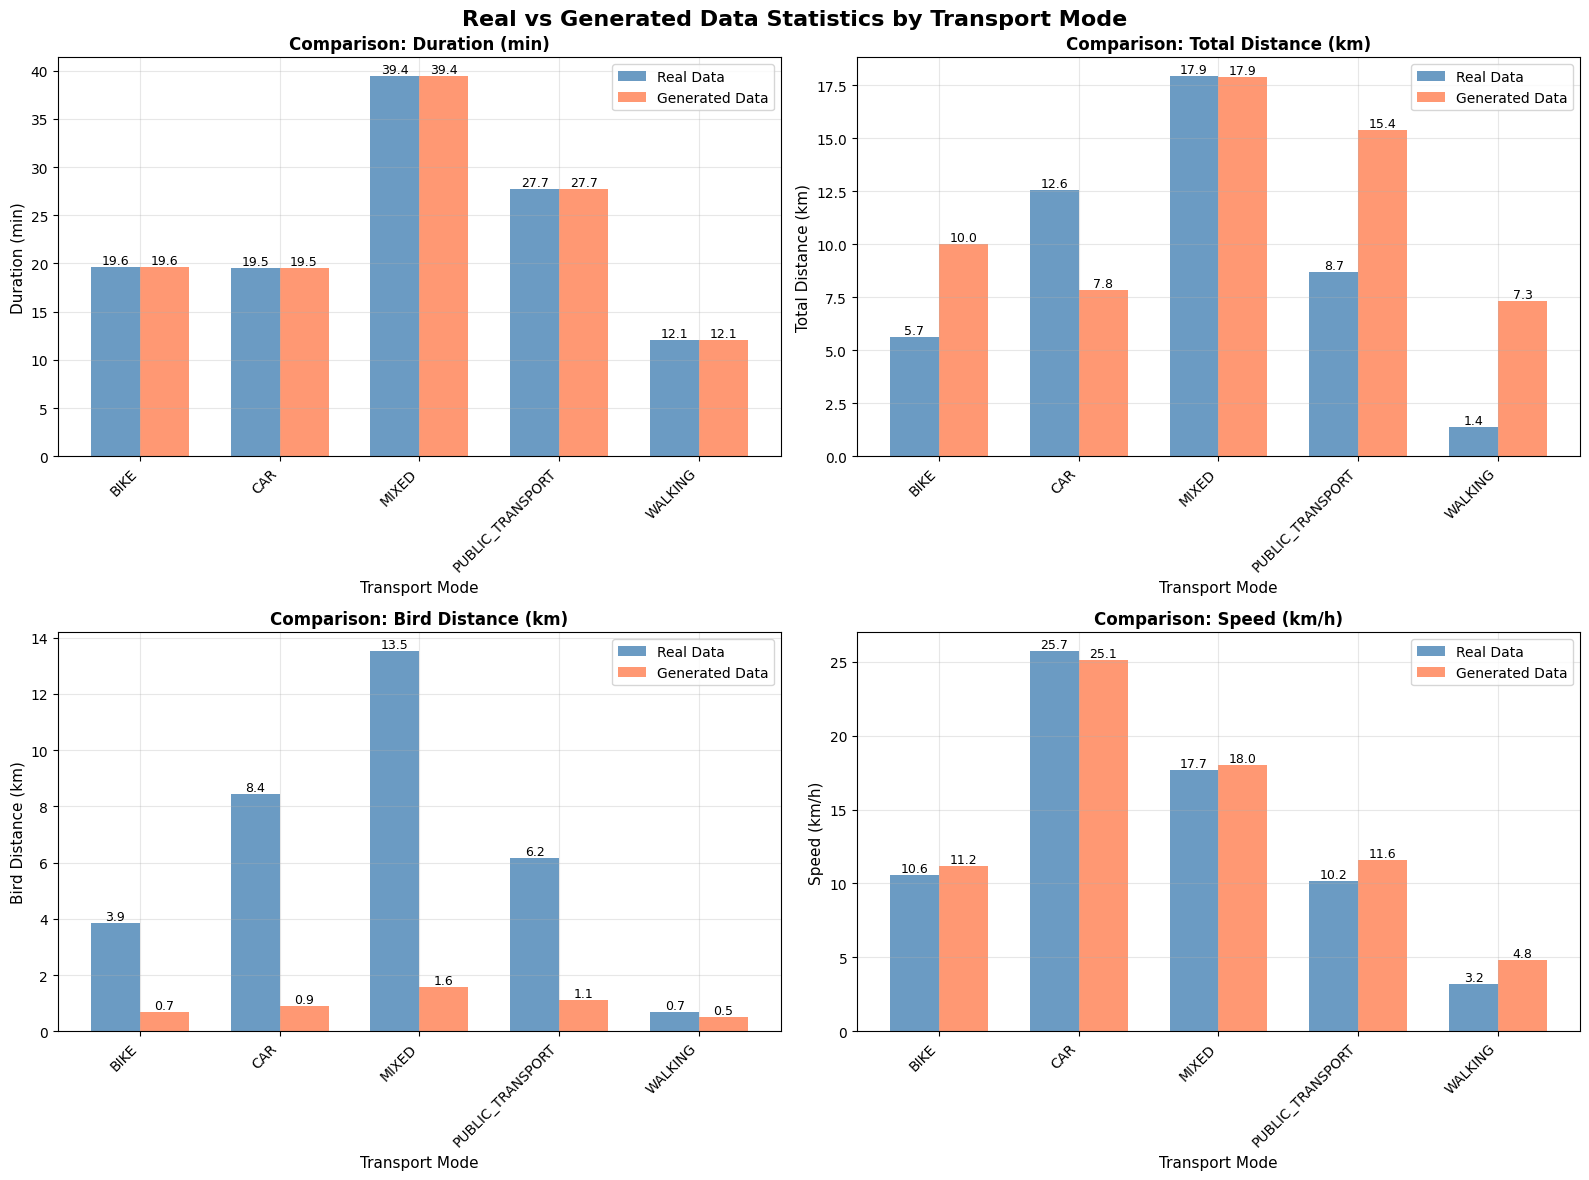

Creating relative differences heatmap...


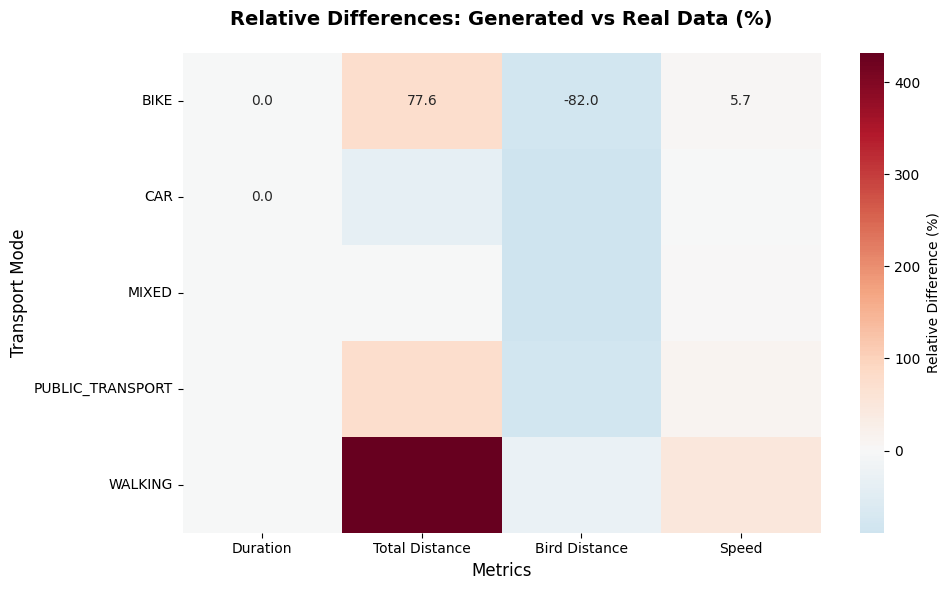

All plots saved successfully!


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set style
plt.style.use('default')
sns.set_palette("husl")

# ============================================================================
# 1. RECONSTRUCTION TRAINING COMPARISON - VALIDATION LOSS BAR GRAPH
# ============================================================================

def create_reconstruction_comparison():
    # Sample validation loss data (MSE + KL loss) - you can replace with your actual values
    data = {
        'Model Type': ['Dense', 'Dense', 'Dense', 'Dense',
                      'LSTM', 'LSTM', 'LSTM', 'LSTM', 
                      'Attention', 'Attention', 'Attention', 'Attention',
                      'Hierarchical', 'Hierarchical', 'Hierarchical', 'Hierarchical'],
        'Validation Loss': [
            # Dense experiments
            0.792, 0.776, 0.734, 0.889,
            # LSTM experiments  
            0.526, 0.552, 0.681, 0.774,
            # Attention experiments
            0.743, 0.758, 0.671, 0.856,
            # Hierarchical experiments
            0.612, 0.498, 0.725, 0.806
        ],
        'Experiment': ['Dense', 'LSTM', 'Attention', 'Hierarchical'] * 4
    }
    
    df = pd.DataFrame(data)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=df, x='Model Type', y='Validation Loss', 
                     hue='Experiment', palette='viridis')
    
    # Customize the plot
    plt.title('MSE Reconstruction Testing Comparison by Model Type', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Model Architecture', fontsize=12)
    plt.ylabel('Validation Loss (MSE + KL)', fontsize=12)
    plt.legend(title='Experiment', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Add value labels on bars
    # for container in ax.containers:
    #     ax.bar_label(container, fmt='%.3f', fontsize=9, rotation=90, padding=3)
    
    plt.tight_layout()
    plt.savefig('reconstruction_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 2. GENERATIVE METRICS COMPARISON
# ============================================================================

def create_generative_metrics_comparison():
    # Real vs Generated data statistics
    real_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 5.65, 'bird_dist': 3.85, 'speed': 10.6},
        'CAR': {'duration': 19.5, 'total_dist': 12.56, 'bird_dist': 8.44, 'speed': 25.7},
        'MIXED': {'duration': 39.4, 'total_dist': 17.93, 'bird_dist': 13.51, 'speed': 17.7},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 8.68, 'bird_dist': 6.16, 'speed': 10.2},
        'WALKING': {'duration': 12.1, 'total_dist': 1.38, 'bird_dist': 0.68, 'speed': 3.2}
    }
    
    generated_data = {
        'BIKE': {'duration': 19.6, 'total_dist': 10.04, 'bird_dist': 0.69, 'speed': 11.2},
        'CAR': {'duration': 19.5, 'total_dist': 7.83, 'bird_dist': 0.91, 'speed': 25.1},
        'MIXED': {'duration': 39.4, 'total_dist': 17.89, 'bird_dist': 1.58, 'speed': 18.0},
        'PUBLIC_TRANSPORT': {'duration': 27.7, 'total_dist': 15.40, 'bird_dist': 1.12, 'speed': 11.6},
        'WALKING': {'duration': 12.1, 'total_dist': 7.33, 'bird_dist': 0.50, 'speed': 4.8}
    }
    
    # Prepare data for plotting
    transport_modes = list(real_data.keys())
    metrics = ['Duration (min)', 'Total Distance (km)', 'Bird Distance (km)', 'Speed (km/h)']
    metric_keys = ['duration', 'total_dist', 'bird_dist', 'speed']
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()
    
    for i, (metric, key) in enumerate(zip(metrics, metric_keys)):
        real_values = [real_data[mode][key] for mode in transport_modes]
        gen_values = [generated_data[mode][key] for mode in transport_modes]
        
        x_pos = np.arange(len(transport_modes))
        width = 0.35
        
        bars1 = axes[i].bar(x_pos - width/2, real_values, width, 
                           label='Real Data', alpha=0.8, color='steelblue')
        bars2 = axes[i].bar(x_pos + width/2, gen_values, width, 
                           label='Generated Data', alpha=0.8, color='coral')
        
        axes[i].set_xlabel('Transport Mode', fontsize=11)
        axes[i].set_ylabel(metric, fontsize=11)
        axes[i].set_title(f'Comparison: {metric}', fontsize=12, fontweight='bold')
        axes[i].set_xticks(x_pos)
        axes[i].set_xticklabels(transport_modes, rotation=45, ha='right')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
        
        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=9)
        
        for bar in bars2:
            height = bar.get_height()
            axes[i].text(bar.get_x() + bar.get_width()/2., height,
                        f'{height:.1f}', ha='center', va='bottom', fontsize=9)
    
    plt.suptitle('Real vs Generated Data Statistics by Transport Mode', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig('generative_metrics_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# 3. RELATIVE DIFFERENCES HEATMAP (BONUS)
# ============================================================================

def create_relative_differences_heatmap():
    # Relative differences data from your results
    differences = {
        'BIKE': [0.0, 77.6, -82.0, 5.7],
        'CAR': [0.0, -37.7, -89.2, -2.5],
        'MIXED': [0.0, -0.2, -88.3, 1.6],
        'PUBLIC_TRANSPORT': [0.0, 77.4, -81.9, 14.2],
        'WALKING': [0.0, 432.0, -26.3, 49.8]
    }
    
    metrics = ['Duration', 'Total Distance', 'Bird Distance', 'Speed']
    transport_modes = list(differences.keys())
    
    # Create DataFrame
    diff_matrix = np.array(list(differences.values()))
    
    plt.figure(figsize=(10, 6))
    sns.heatmap(diff_matrix, 
                xticklabels=metrics,
                yticklabels=transport_modes,
                annot=True, 
                fmt='.1f',
                cmap='RdBu_r',
                center=0,
                cbar_kws={'label': 'Relative Difference (%)'})
    
    plt.title('Relative Differences: Generated vs Real Data (%)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Metrics', fontsize=12)
    plt.ylabel('Transport Mode', fontsize=12)
    plt.tight_layout()
    plt.savefig('relative_differences_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# RUN ALL PLOTS
# ============================================================================

if __name__ == "__main__":
    print("Creating reconstruction comparison plot...")
    create_reconstruction_comparison()
    
    print("Creating generative metrics comparison plot...")
    create_generative_metrics_comparison()
    
    print("Creating relative differences heatmap...")
    create_relative_differences_heatmap()
    
    print("All plots saved successfully!")